## Guide to Markdown

https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd


In [2]:
(1.1*0.9 - 1)*100

-0.9999999999999898

In [3]:
(((1 + 0.01)**4)-1)*100

4.060401000000002

# Lab Session - Basics of returns

Following along the EDHEC guy

Rt,t+1 = (Pt+1 - Pt) / P = (Pt+1 / Pt)  - 1


In [15]:
prices_a = [8.70, 8.91, 8.71]

In [13]:
8.91/8.70 - 1

0.024137931034482918

In [14]:
8.71/8.91 - 1

-0.022446689113355678

In [20]:
prices_a[:-1]

[8.7, 8.91]

In [21]:
prices_a[1:]

[8.91, 8.71]

In [22]:
prices_a[1:] / prices_a[:-1]
# error unsupported operand type(s) for /: 'list' and 'list' 
# list in python are not vector
# below some work around to remove the alignment

TypeError: unsupported operand type(s) for /: 'list' and 'list'

Pandas is a really wrapper around numpy

In [23]:
import numpy as np

In [24]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([ 8.7 ,  8.91,  8.71])

In [25]:
prices_a[1:] / prices_a[:-1]
# works now as it's a numpy array and no longer a list

array([ 1.02413793,  0.97755331])

In [40]:
import pandas as pd
#the argument of the pd.dataframe is a dictionnar
prices = pd.DataFrame({"BLUE":[8.70, 8.91, 8.71,8.43, 8.73],
                      "ORANGE":[10.66, 11.08,10.71,11.59,12.11] })

In [41]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [42]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [43]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [44]:
prices.iloc[1:] / prices.iloc[:-1]
# not giving the corrrect answer due to the indexes automatically creat by pandas
# to make it work we have to remove the allignment 

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


In [45]:
# work arround #1 
# using values to transform back to numpy array in order to get a positionless division
prices.iloc[1:].values/ prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [48]:
#doesnt matter where we put the .values conversion as long as one the term doesn't have index
prices.iloc[1:]/ prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [49]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [50]:
# work arround #2 with .shift() function
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [51]:
prices/ prices.shift(1) - 1 
# n prices thus n-1 return

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [53]:
# work arround #3 with df method called pct_change
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [56]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [57]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [59]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [71]:
prices.plot()
# sometime this won't plot directly your graphics so you should add some sophisticated additionnal lines

In [72]:
# magic solution 
%matplotlib inline

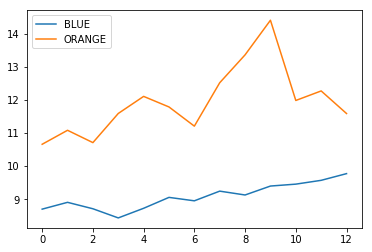

In [73]:
prices.plot()

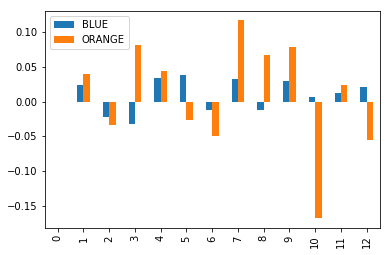

In [74]:
returns.plot.bar()

In [75]:
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [76]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [77]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [78]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [79]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [81]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [82]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [83]:
((returns+1).prod()-1)*100

BLUE      12.331034
ORANGE     8.716698
dtype: float64

In [84]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Annualization

In [86]:
rm = 0.01
(1+rm)**12-1

0.12682503013196977

In [87]:
rq = 0.04
(1+rq)**4-1

0.1698585600000002

In [90]:
rd = 0.0001
(1+rd)**252-1

0.025518911987694626